In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from collections import Counter

In [8]:
data_path = '../../data/metadata/'

In [9]:
fandom_list = [line.strip() for line in open('../../data/fandom_filtered_list')]

In [10]:
df = pd.read_csv(data_path + fandom_list[0] + '_metadata.tsv', sep = '\t')

In [19]:
d1 = Counter({'a': 1, 'b': 2})

In [20]:
d2 = Counter({'b': 1, 'c': 3})

In [21]:
d1+d2

Counter({'a': 1, 'b': 3, 'c': 3})

In [22]:
df.head(2)

,AdditionalTags,ArchiveWarnings,Author,Bookmarks,Category,ChapterIndex,Chapters,Characters,Comments,CompleteDate,...,Language,Notes,PublishDate,Rating,Relationship,Summary,Title,URL,UpdateDate,Words
0,"Plot What Plot/Porn Without Plot, Vaginal Fing...",Underage,MorganasCrow,0,F/F,NaN,1,"Morgana (Merlin), Morgause (Merlin)",0,2015-06-16,...,English,NaN,2015-06-16,Explicit,Morcest,Morgana and Morgause enjoy wild games.,What The Fag You Think You\'re Doing?,http://archiveofourown.org/works/4146375?view_...,NaN,933.0
1,"blind!Arthur, Blindness, Minor Violence, Impli...",Creator Chose Not To Use Archive Warnings,SoCanonItHurts,4,M/M,NaN,1,"Merlin (Merlin), Arthur Pendragon (Merlin), Gw...",0,NaN,...,English,"Warning: I know nothing about being blind, all...",2016-04-17,Mature,"Merlin/Arthur Pendragon, Gwaine/Merlin (Merlin...",Merlin has a wonderful night with a mysteriou...,Obstacles in Our Way,http://archiveofourown.org/works/6575791?view_...,2016-04-16,1317.0


### Time dist

In [30]:
times = Counter()
for fandom in fandom_list:
    df = pd.read_csv(data_path + fandom + '_metadata.tsv', sep = '\t')
    times += Counter(df.PublishDate.str[:7].tolist())

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
times

Counter({'1950-03': 3,
         '1950-08': 1,
         '1950-10': 2,
         '1950-11': 1,
         '1952-02': 2,
         '1954-12': 1,
         '1957-03': 2,
         '1983-07': 2,
         '1983-10': 1,
         '1983-11': 14,
         '1984-08': 2,
         '1987-11': 2,
         '1990-01': 1,
         '1996-08': 1,
         '1996-10': 4,
         '1997-08': 15,
         '1998-01': 5,
         '1999-01': 4,
         '1999-02': 21,
         '1999-03': 1,
         '1999-04': 17,
         '1999-05': 8,
         '1999-06': 3,
         '1999-07': 10,
         '1999-08': 10,
         '1999-09': 8,
         '1999-10': 18,
         '1999-11': 16,
         '1999-12': 8,
         '2000-01': 47,
         '2000-02': 7,
         '2000-03': 8,
         '2000-04': 2,
         '2000-05': 2,
         '2000-06': 26,
         '2000-07': 8,
         '2000-08': 3,
         '2000-09': 9,
         '2000-10': 6,
         '2000-11': 4,
         '2000-12': 36,
         '2001-01': 34,
         '2001-02': 18

In [ ]:

# Generate the main data
X = np.linspace(-6, 6, 1024)
Y = np.sinc(X)

# Generate data for the zoomed portion
X_detail = np.linspace(-3, 3, 1024)
Y_detail = np.sinc(X_detail)

# plot the main figure
plt.plot(X, Y, c = 'k')  

 # location for the zoomed portion 
sub_axes = plt.axes([.6, .6, .25, .25]) 

# plot the zoomed portion
sub_axes.plot(X_detail, Y_detail, c = 'k') 

# insert the zoomed figure
# plt.setp(sub_axes)



/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


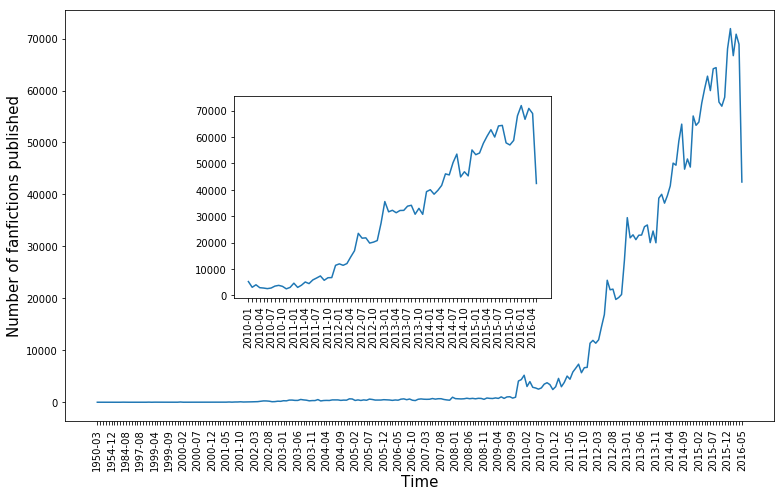

In [92]:
labels = sorted(times.keys())[:-1]
x = np.arange(0, len(labels))
y = [times[k] for k in labels]

labels_f = [l if labels.index(l)%5==0 else '' for l in labels ]
fig, ax = plt.subplots(figsize=[11,7])
plt.plot(x, y)
plt.xticks(x, labels_f, rotation=90)

plt.xlabel("Time", fontsize=15)
plt.ylabel("Number of fanfictions published",fontsize=15)

start_idx = labels.index('2010-01')
end_idx = labels.index('2016-05')
x_zoom = np.arange(0, end_idx-start_idx+1)
y_zoom = [times[k] for k in labels[start_idx:end_idx+1]]
x_zoom_labels = labels[start_idx:end_idx+1]
x_zoom_labels_f = [l if x_zoom_labels.index(l)%3==0 else '' for l in x_zoom_labels ] 
sub_axes = plt.axes([.3, .4, .4, .4]) 
sub_axes.plot(x_zoom, y_zoom) 
sub_axes.set_xticks(x_zoom)
sub_axes.set_xticklabels(x_zoom_labels_f, rotation=90)

plt.tight_layout()
plt.savefig("fic_time_dist.pdf", format="pdf")

### Plot length dist

In [25]:
len_list = []
for fandom in fandom_list:
    df = pd.read_csv(data_path + fandom + '_metadata.tsv', sep = '\t')
    df['ave_len'] = df.Words/df.Chapters
    df = df.dropna(subset=['ave_len'])
    len_list.extend(df['ave_len'].tolist())

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
len_list = [elem for elem in len_list if not np.isnan(elem)]

len_list = [elem for elem in len_list if not np.isinf(elem)]

len_list = [elem for elem in len_list if elem > 0]

In [46]:
sorted(len_list)[-20:]

[87014.0,
 87144.0,
 87365.0,
 87839.0,
 88689.0,
 89573.0,
 90368.0,
 97675.0,
 101221.0,
 102075.0,
 102075.0,
 106694.0,
 111581.0,
 128942.0,
 157817.0,
 184597.0,
 216450.0,
 323693.0,
 323693.0,
 576696.0]

In [42]:
l = [1,2,3,4]

In [44]:
l[-2:]

[3, 4]

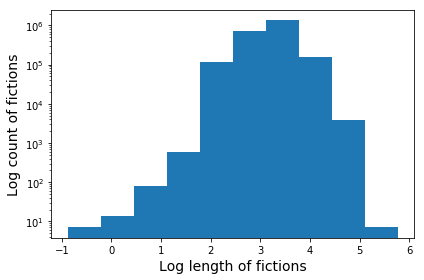

In [65]:
plt.hist(np.log10(len_list), log=True)
plt.xlabel("Log length of fictions",fontsize=14)
plt.ylabel("Log count of fictions",fontsize=14)
plt.tight_layout()
plt.savefig("fic_len_dist.pdf", format='pdf')

In [40]:
2*np.e**10

44052.93158961341

### Kudos

In [58]:
kudos_list = []
for fandom in fandom_list:
    df = pd.read_csv(data_path + fandom + '_metadata.tsv', sep = '\t')
    df['ave_kudos'] = df.Kudos/df.Chapters
    df = df.dropna(subset=['ave_kudos'])
    kudos_list.extend(df['ave_kudos'].tolist())

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
kudos_list = [elem for elem in kudos_list if not np.isnan(elem)]

kudos_list = [elem for elem in kudos_list if not np.isinf(elem)]

kudos_list = [elem for elem in kudos_list if elem > 0]

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)

Y = np.log10(sorted(x1))
N = len(Y)
X = np.logspace( 1/N, 1, num=N)
plt.plot(X,Y, label='Kudos')
plt.xlabel('Logged Kudos',fontsize = '14')
plt.ylabel("Logged Number of fictions", fontsize='14')

plt.subplot(1, 2, 2)

Y = np.log10(sorted(x2))
N = len(Y)
X = np.logspace( 1/N, 1, num=N)
plt.plot(X,Y, label='Hits')
plt.xlabel('Logged Hits',fontsize = '14')
plt.ylabel("Logged Number of fictions", fontsize='14')
plt.savefig('kudos_hits_dist.png', type='png')



In [62]:
len(kudos_listdos_list)

2335075

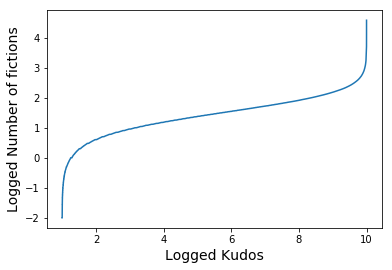

In [66]:
Y = np.log10(sorted(kudos_list))
N = len(Y)
X = np.logspace( 1/N, 1, num=N)
plt.plot(X,Y, label='Kudos')
plt.xlabel('Logged Kudos',fontsize = '14')
plt.ylabel("Logged Number of fictions", fontsize='14')
plt.savefig('kudos_dist.pdf', type='pdf')
